In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1. Read the dataset to the python environment.

In [2]:
iris_df = pd.read_excel(r'C:\Users\DELNA ROSE\Downloads\iris (3).xls')

In [3]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 2. Do the necessary pre-processing steps.

In [6]:
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
iris_df['SL'] = iris_df['SL'].fillna(iris_df['SL'].mean())
iris_df['SW'] = iris_df['SW'].fillna(iris_df['SW'].mean())
iris_df['PL'] = iris_df['PL'].fillna(iris_df['PL'].mean())

In [8]:
iris_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

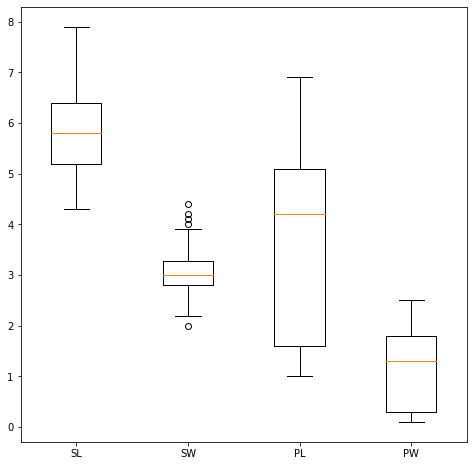

In [9]:
#outliers 
plt.figure(figsize=(8,8))
plt.boxplot(iris_df.loc[:, iris_df.columns != 'Classification'],labels=['SL','SW','PL','PW'])

plt.show()

In [ ]:
#Outlier found only in SW. They are not extreme values.Also since this is a small dataset, not proceeding further to trim the column.

In [11]:
Q1=np.percentile(iris_df["SW"],25,interpolation="midpoint")
Q2=np.percentile(iris_df["SW"],50,interpolation="midpoint")
Q3=np.percentile(iris_df["SW"],75,interpolation="midpoint")

print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [12]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [13]:
outlier=[]
for x in iris_df["SW"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [15]:
ind1=iris_df['SW']>up_lim
iris_df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [16]:
ind2=iris_df['SW']<low_lim
iris_df.loc[ind2].index

Int64Index([60], dtype='int64')

In [19]:
iris_df.drop([14,15,32,33,60],inplace=True)

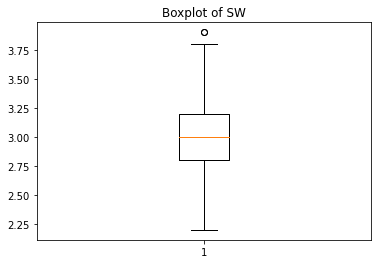

In [20]:
plt.boxplot(iris_df['SW'])
plt.title("Boxplot of SW")
plt.show()

# 3. Find out which classification modelgives the best result to predict iris species.(also do random forest algorithm)

In [25]:
#Splitting data into dependent and independent variable
X = iris_df.drop(['Classification'],axis=1)
y = iris_df['Classification']

In [26]:
#label encoding for y
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
y= label_en.fit_transform(y)

In [27]:
# Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [28]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:

X_train.shape

(116, 4)

In [ ]:

#these are the algorithms to compare:

#Logistic Regression
#K – Nearest Neighbour (KNN)
#Support Vector Machine (SVM)
#Decision Tree
#Random Forest

# a. LogisticRegression

In [30]:

from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)

y_pred = logi_model.predict(X_test)

In [31]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29

[[9 0 0]
 [0 9 0]
 [0 2 9]]
Accuracy is 0.9310344827586207


# b. KNN Model 

In [32]:


from sklearn.neighbors import KNeighborsClassifier


acc_values = [] 
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    
    
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)   

[0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.896551724137931, 0.9310344827586207, 0.896551724137931, 0.9310344827586207, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931]


Text(0, 0.5, 'Accuracy')

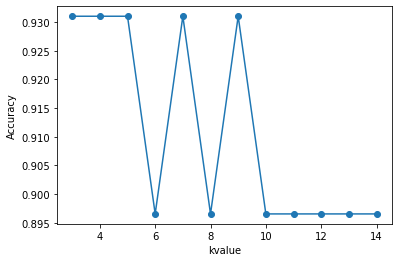

In [33]:

plt.plot(neighbors,acc_values, 'o-') 
plt.xlabel('kvalue')
plt.ylabel('Accuracy')

In [34]:

classifier = KNeighborsClassifier(n_neighbors = 6,metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


# c. SVM

In [35]:

from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        29
   macro avg       0.92      0.91      0.90        29
weighted avg       0.92      0.90      0.90        29

[[9 0 0]
 [0 9 0]
 [0 3 8]]
accuracy is 0.896551724137931


# d. Decision Tree

In [36]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


# e. Random Forest 

In [37]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=10,random_state =42,
                            criterion='entropy',max_features='log2')
classifer = rf.fit(X_train,y_train) 

y_predict = classifier.predict(X_test) 


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


In [42]:

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy is 0.9310344827586207


from this we can concluded that logistic regression method have more accuracy.